In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/rasbt/'\
    'python-machine-learning-book-2nd-edition'\
    '/master/code/ch10/housing.data.txt',
    header=None,
    sep='\s+'
)

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
             'NOX', 'RM', 'AGE', 'DIS', 'RAD',
             'TAX', 'PTRATIO', 'B', 'LSTAT',
             'MEDV']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

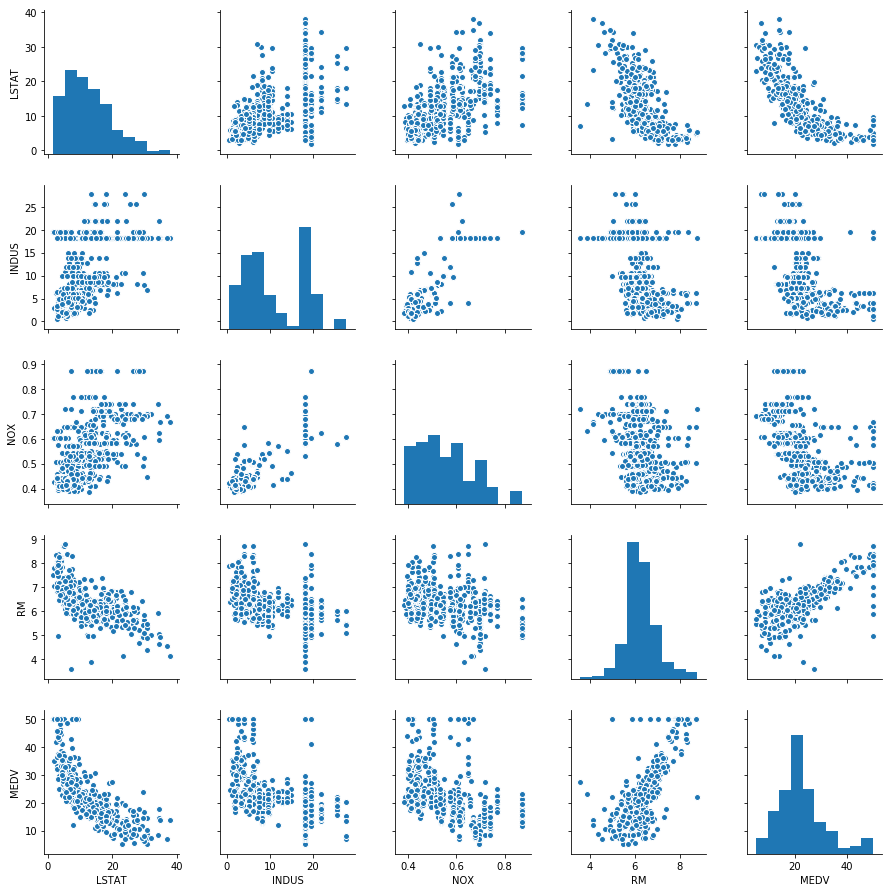

In [8]:
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

In [9]:
import numpy as np

In [10]:
cm = np.corrcoef(df[cols].values.T)

In [11]:
sns.set(font_scale=1.5)

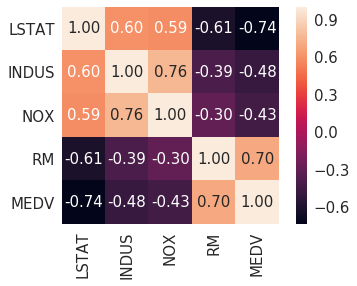

In [12]:
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={
                    'size': 15
                },
                 yticklabels=cols,
                 xticklabels=cols
                )

In [13]:
# Implementing an ordinary least squares linear regression model

In [14]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost= (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        return self.net_input(X)

In [15]:
X = df[['RM']].values
y = df['MEDV'].values

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [18]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [19]:
lr = LinearRegressionGD()

In [20]:
lr.fit(X_std, y_std)

In [21]:
lr.cost_

[252.99999999999994,
 160.5214570333027,
 137.95336332188174,
 132.44593600492144,
 131.1019254721997,
 130.7739385178364,
 130.69389789344143,
 130.67436509962656,
 130.66959839475516,
 130.66843514716513,
 130.6681512728763,
 130.66808199733032,
 130.66806509160318,
 130.66806096599714,
 130.66805995920078,
 130.6680597135062,
 130.66805965354789,
 130.6680596389159,
 130.66805963534514,
 130.66805963447376]

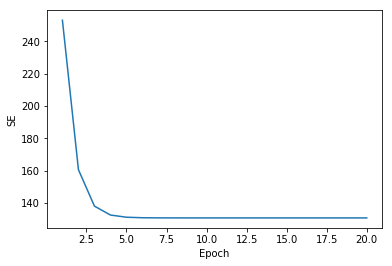

In [22]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SE')
plt.xlabel('Epoch')
plt.show()

In [23]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white',
               s=70)
    plt.plot(X, model.predict(X),
            color='black', lw=2)
    return None

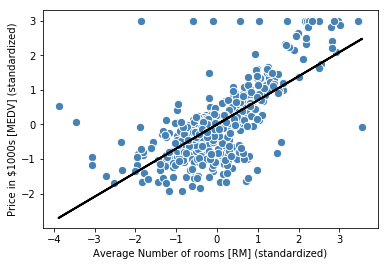

In [24]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average Number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [25]:
num_rooms_std = sc_x.transform([[5.0]])
prices_std = lr.predict(num_rooms_std)

In [26]:
print("Price in $1000s: %.3f" % sc_y.inverse_transform(prices_std))

Price in $1000s: 10.840


In [27]:
print("Slope: %.3f" % lr.w_[1])

Slope: 0.695


In [28]:
print("Intercept: %.3f" % lr.w_[0])

Intercept: -0.000


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
slr = LinearRegression()

In [31]:
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print('Slope: %.3f' % slr.coef_[0])

Slope: 9.102


In [33]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: -34.671


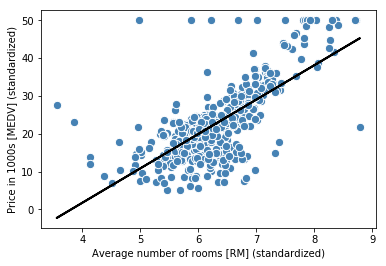

In [34]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in 1000s [MEDV] (standardized)')
plt.show()

In [35]:
# an alternative to throw out outliers is the RANSAC model

In [36]:
from sklearn.linear_model import RANSACRegressor

In [37]:
# we wrap LinearRegression() with RANSAc
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

In [38]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [39]:
inlier_mask = ransac.inlier_mask_

In [40]:
outlier_mask = np.logical_not(inlier_mask)

In [41]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

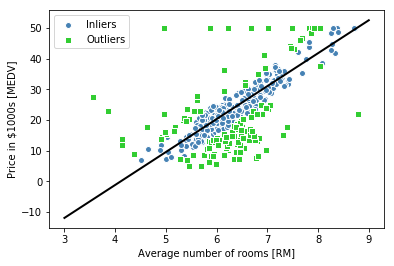

In [42]:
plt.scatter(X[inlier_mask], y[inlier_mask],
           c='steelblue', edgecolor='white',
           marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
           c='limegreen', edgecolor='white',
           marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black',
        lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [43]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

Slope: 10.735


In [44]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: -44.089


In [45]:
# evaluating the performance of linear regression models

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [49]:
slr = LinearRegression()

In [50]:
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

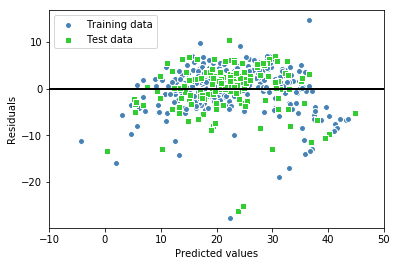

In [52]:
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10,
          xmax=50, color='black',
          lw=2)
plt.xlim([-10, 50])
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [55]:
# the lower MSE on the training data with the higher MSE on the test data is 
# showing us that we are overfitting the data

In [56]:
from sklearn.metrics import r2_score

In [57]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge = Ridge(alpha=1.0)

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso = Lasso(alpha=1.0)

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

In [66]:
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [67]:
lr = LinearRegression()

In [68]:
pr = LinearRegression()

In [69]:
quadratic = PolynomialFeatures(degree=2)

In [70]:
X_quad = quadratic.fit_transform(X)

In [71]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
X_fit = np.arange(250, 600, 10)[:, np.newaxis]

In [73]:
y_lin_fit = lr.predict(X_fit)

In [74]:
pr.fit(X_quad, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

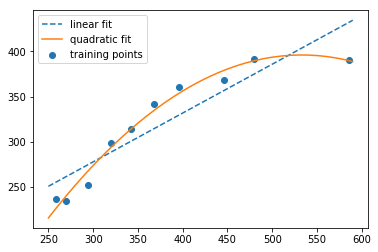

In [76]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit,
        label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
        label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [79]:
tree = DecisionTreeRegressor(max_depth=3)

In [80]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
sort_idx = X.flatten().argsort()

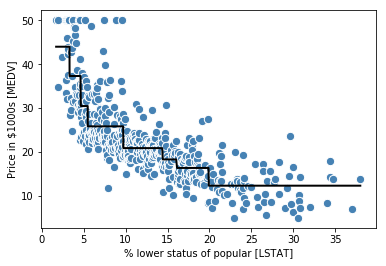

In [83]:
# captures the general trend in the data
# however, does not capture the continuity and differentiability
# of the desired prediction
# we also need to tune the max_depth
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of popular [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [84]:
# random forests allows us to improve on this initial solution

In [85]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
forest = RandomForestRegressor(
    n_estimators=1000,
    criterion='mse',
    random_state=1,
    n_jobs=-1
)

In [88]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [89]:
y_train_pred = forest.predict(X_train)

In [90]:
y_test_pred = forest.predict(X_test)

In [91]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)
))

MSE train: 1.642, test: 11.052


In [92]:
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)
))

R^2 train: 0.979, test: 0.878


In [93]:
# we are clearly overfitting the data